## Notebook Imports and Packages

In [51]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm # color map
from sympy import symbols, diff
from math import log
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
%matplotlib inline

# Example 1 - A simple cost function

## $$f(x) = x^2 + x + 1$$

In [52]:
def f(x):
    return (x**2 + x + 1)

In [53]:
# Make Data
x_1 = np.linspace(start=-3,stop=3,num=5000)


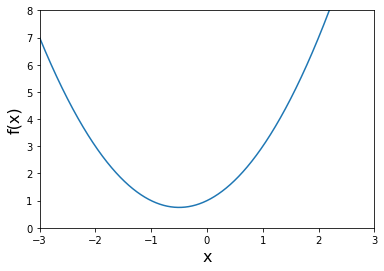

In [54]:
# Plot
plt.xlim([-3,3])
plt.ylim(0,8)
plt.xlabel('x',fontsize=16)
plt.ylabel('f(x)',fontsize=16)

plt.plot(x_1,f(x_1))
plt.show()


## Slope & Derivatives
Challenge: Create a python function for the derivative of $f(x)$ called $df(x)/dx$

In [55]:
def df(x):
    return 2*x + 1

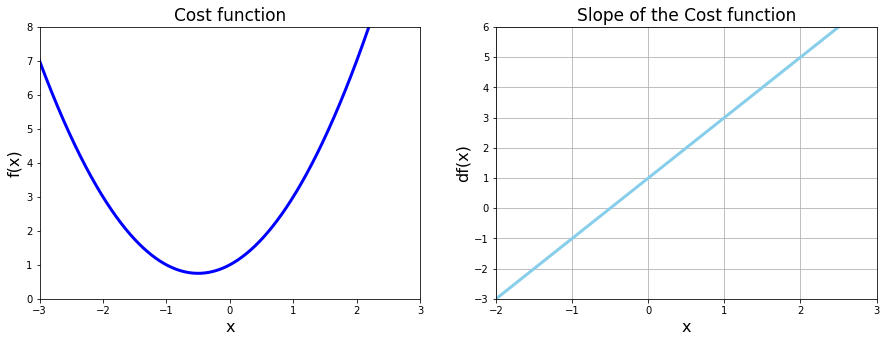

In [56]:
# Plot function and derivative side by side
plt.figure(figsize=[15,5])
# 1 Chart: Cost Function
plt.subplot(1,2,1)
plt.xlim(-3,3)
plt.ylim(0,8)
plt.title('Cost function',fontsize=17)
plt.xlabel('x',fontsize=16)
plt.ylabel('f(x)',fontsize=16)
plt.plot(x_1,f(x_1),c="b",lw=3)
# 2 Chart: Derivative
plt.subplot(1,2,2)
plt.xlim(-2,3)
plt.ylim(-3,6)
plt.title('Slope of the Cost function',fontsize=17)
plt.xlabel('x',fontsize=16)
plt.ylabel('df(x)',fontsize=16)
plt.grid()
plt.plot(x_1,df(x_1),c="skyblue",lw=3)
plt.show()

## Python Loops & Gradient Descent

In [57]:
# Python For loop
for i in range(5):
    print("Hello world ",i)
print('End of Loop')    


Hello world  0
Hello world  1
Hello world  2
Hello world  3
Hello world  4
End of Loop


In [58]:
# Python While loop
j=0
while j < 7:
    print("Counting .... ",j)
    j=j+1
print('Ready or not, Here I come')  

Counting ....  0
Counting ....  1
Counting ....  2
Counting ....  3
Counting ....  4
Counting ....  5
Counting ....  6
Ready or not, Here I come


In [59]:
# Gradient Descent
new_x = 3
previous_x = 0
step_multiplier = 0.1
precision = 0.00001
x_list = [new_x]
slope_list = [df(new_x)]
for n in range(50):
    previous_x=new_x
    gradient = df(previous_x)
    new_x=previous_x-step_multiplier * gradient
    step_size = abs(new_x-previous_x)
    
    x_list.append(new_x)
    slope_list.append(df(new_x))

    if step_size < precision:
        print('Loop ran this many times ',n)
        break


print("Local Minimum occurs at:", new_x)
print('Slope or df(x) value at this point',df(new_x))
print('Cost or f(x) value at this point',f(new_x))    


Local Minimum occurs at: -0.4999500463307553
Slope or df(x) value at this point 9.990733848941336e-05
Cost or f(x) value at this point 0.750000002495369


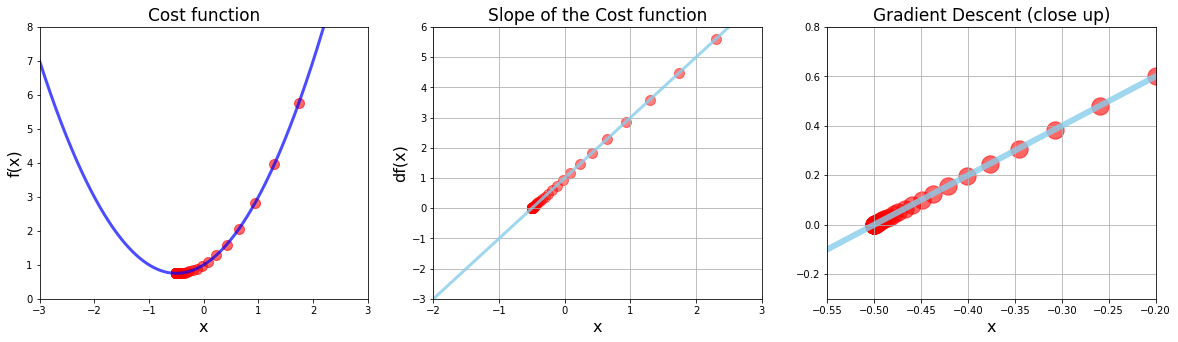

In [60]:
# Super impose gradient descent calculations
plt.figure(figsize=[20,5])
# 1 Chart: Cost Function
plt.subplot(1,3,1)
plt.xlim(-3,3)
plt.ylim(0,8)
plt.title('Cost function',fontsize=17)
plt.xlabel('x',fontsize=16)
plt.ylabel('f(x)',fontsize=16)
plt.plot(x_1,f(x_1),c="b",lw=3,alpha=0.7)
values= np.array(x_list)
plt.scatter(x=x_list,y=f(values),c='r',alpha=0.6,s=100)
# 2 Chart: Derivative
plt.subplot(1,3,2)
plt.xlim(-2,3)
plt.ylim(-3,6)
plt.title('Slope of the Cost function',fontsize=17)
plt.xlabel('x',fontsize=16)
plt.ylabel('df(x)',fontsize=16)
plt.grid()
plt.plot(x_1,df(x_1),c="skyblue",lw=3,alpha=0.8)
plt.scatter(x_list,slope_list,s=100,c='r',alpha=0.5)
# 3 Chart: Derivative(close up)
plt.subplot(1,3,3)
plt.xlim(-0.55,-0.2)
plt.ylim(-0.3,0.8)
plt.title('Gradient Descent (close up)',fontsize=17)
plt.xlabel('x',fontsize=16)
plt.grid()
plt.plot(x_1,df(x_1),c="skyblue",lw=6,alpha=0.8)
plt.scatter(x_list,slope_list,s=300,c='r',alpha=0.6)
plt.show()


# Example 2 - Multiple Minima vs Initial Guess & Advanced Functions
## $$g(x) = x^4 -4x^2 + 5$$

In [61]:
# Make some data
x_2 = np.linspace(start=-2,stop=2,num=1000)

# challenge : Write the g(x) function and the dg(x) function in python
def g(x):
    return x**4 - 4*x**2 + 5
def dg(x):
    return 4*x**3 -8*x

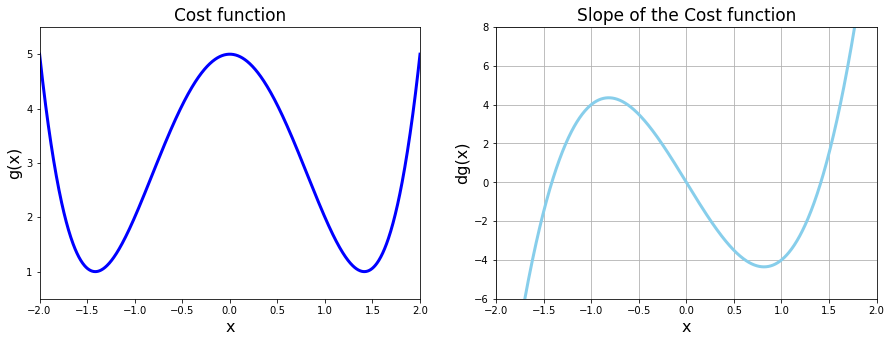

In [62]:
# Plot function and derivative side by side
plt.figure(figsize=[15,5])
# 1 Chart: Cost Function
plt.subplot(1,2,1)
plt.xlim(-2,2)
plt.ylim(0.5,5.5)
plt.title('Cost function',fontsize=17)
plt.xlabel('x',fontsize=16)
plt.ylabel('g(x)',fontsize=16)
plt.plot(x_2,g(x_2),c="b",lw=3)
# 2 Chart: Derivative
plt.subplot(1,2,2)
plt.xlim(-2,2)
plt.ylim(-6,8)
plt.title('Slope of the Cost function',fontsize=17)
plt.xlabel('x',fontsize=16)
plt.ylabel('dg(x)',fontsize=16)
plt.grid()
plt.plot(x_2,dg(x_2),c="skyblue",lw=3)
plt.show()

## Graient Descent as a python function

In [63]:
# Gradient Descent
def gradient_descent(derivative_func,initial_guess,multiplier=0.02,precision=0.001,max_iter=300):
    new_x = initial_guess
    x_list = [new_x]
    slope_list = [derivative_func(new_x)]
    for n in range(max_iter):
        previous_x=new_x
        gradient = derivative_func(previous_x)
        new_x=previous_x-multiplier * gradient
        step_size = abs(new_x-previous_x)
        
        x_list.append(new_x)
        slope_list.append(derivative_func(new_x))

        if step_size < precision:            
            break
    return new_x, x_list, slope_list




In [64]:
local_min,list_x,deriv_list=gradient_descent(derivative_func= dg,initial_guess= 0.5, multiplier = 0.01,precision = 0.0001)
print('Local min occurs at: ',local_min)
print('Number of steps: ',len(list_x))


Local min occurs at:  1.4137636556157256
Number of steps:  56


In [65]:
local_min,list_x,deriv_list=gradient_descent(derivative_func= dg,initial_guess= -0.1)
print('Local min occurs at: ',local_min)
print('Number of steps: ',len(list_x))


Local min occurs at:  -1.4120887490901561
Number of steps:  34


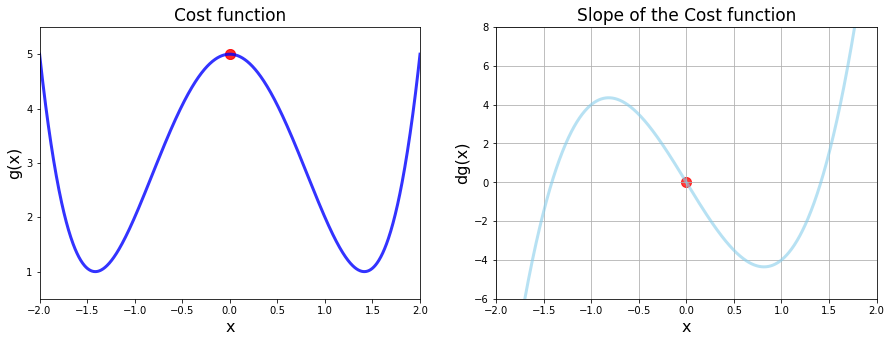

In [66]:
#Calling gradient descent function
local_min,list_x,deriv_list=gradient_descent(derivative_func= dg,initial_guess= 0)
# Plot function, derivative and scatter plot side by side

plt.figure(figsize=[15,5])
# 1 Chart: Cost Function
plt.subplot(1,2,1)
plt.xlim(-2,2)
plt.ylim(0.5,5.5)
plt.title('Cost function',fontsize=17)
plt.xlabel('x',fontsize=16)
plt.ylabel('g(x)',fontsize=16)
plt.plot(x_2,g(x_2),c="b",lw=3,alpha=0.8)
plt.scatter(list_x,g(np.array(list_x)),c='r',s=100,alpha=0.6)
# 2 Chart: Derivative
plt.subplot(1,2,2)
plt.xlim(-2,2)
plt.ylim(-6,8)
plt.title('Slope of the Cost function',fontsize=17)
plt.xlabel('x',fontsize=16)
plt.ylabel('dg(x)',fontsize=16)
plt.grid()
plt.plot(x_2,dg(x_2),c="skyblue",lw=3,alpha=0.6)
plt.scatter(list_x,deriv_list,c='r',s=100,alpha=0.5)
plt.show()

# Example 3 - Divergence, Overflow, Python Tuples
## $$h(x) = x^5 - 2x^4 + 2$$


In [67]:
# Make data
x_3=np.linspace(start=-2.5,stop=2.5,num=1000)

def h(x):
    return x**5 - 2*x**4 + 2
def dh(x):
    return 5*x**4 - 8*x**3
    

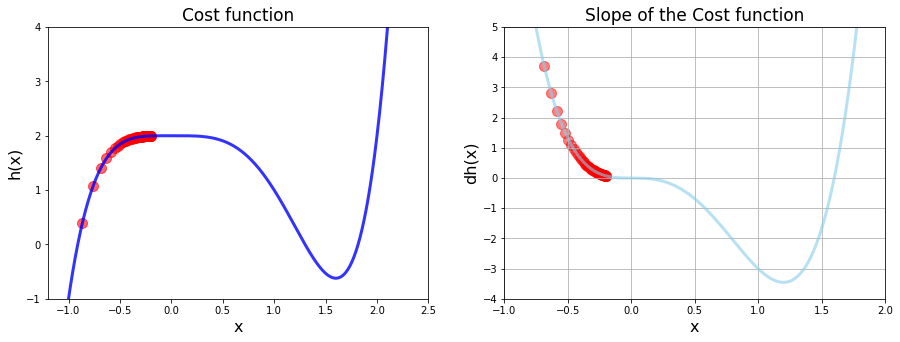

Local min occurs at  -1.8398461123332792e+24
Cost at this min is  -2.1081790694225687e+121
Number of steps  72


In [68]:
#Calling gradient descent function
local_min,list_x,deriv_list=gradient_descent(derivative_func= dh,initial_guess= -0.2,max_iter=71)
# Plot function, derivative and scatter plot side by side

plt.figure(figsize=[15,5])
# 1 Chart: Cost Function
plt.subplot(1,2,1)
plt.xlim(-1.2,2.5)
plt.ylim(-1,4)
plt.title('Cost function',fontsize=17)
plt.xlabel('x',fontsize=16)
plt.ylabel('h(x)',fontsize=16)
plt.plot(x_3,h(x_3),c="b",lw=3,alpha=0.8)
plt.scatter(list_x,h(np.array(list_x)),c='r',s=100,alpha=0.6)
# 2 Chart: Derivative
plt.subplot(1,2,2)
plt.xlim(-1,2)
plt.ylim(-4,5)
plt.title('Slope of the Cost function',fontsize=17)
plt.xlabel('x',fontsize=16)
plt.ylabel('dh(x)',fontsize=16)
plt.grid()
plt.plot(x_3,dh(x_3),c="skyblue",lw=3,alpha=0.6)
plt.scatter(list_x,deriv_list,c='r',s=100,alpha=0.5)
plt.show()
print('Local min occurs at ',local_min)
print('Cost at this min is ',h(local_min))
print('Number of steps ',len(list_x))

In [69]:
import sys
# help(sys)
# sys.version
# type(h(local_min))
sys.float_info.max

1.7976931348623157e+308

## Python Tuples

In [70]:
# Creating a tuple - tuple packing
breakfast = 'bacon','eggs','avocado'
unlucky_numbers = 13,4,9,26,17

print('I loooove ',breakfast[0])
print('My hotel has no ' + str(unlucky_numbers[1]) + 'th floor')

not_my_address = 1,'Infinite Loop','Cupertino',95014

tuple_with_single_value = 42,

type(tuple_with_single_value)

main,side,greens = breakfast 
print('Main course is',main)

data_tuple = gradient_descent(dh,0.2)
print('Local min occurs at ',data_tuple[0])
print('Cost at this min is ',h(data_tuple[0]))
print('Number of steps ',len(data_tuple[1]))


I loooove  bacon
My hotel has no 4th floor
Main course is bacon
Local min occurs at  1.5989534547394717
Cost at this min is  -0.6214287992331258
Number of steps  117


# The Learning Rate

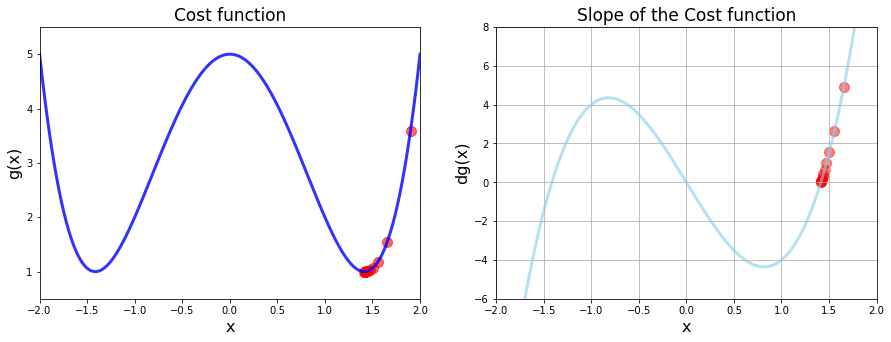

Number of steps is: 14


In [71]:
#Calling gradient descent function
local_min,list_x,deriv_list=gradient_descent(derivative_func= dg,initial_guess= 1.9,multiplier=0.02,max_iter=500)
# Plot function, derivative and scatter plot side by side

plt.figure(figsize=[15,5])
# 1 Chart: Cost Function
plt.subplot(1,2,1)
plt.xlim(-2,2)
plt.ylim(0.5,5.5)
plt.title('Cost function',fontsize=17)
plt.xlabel('x',fontsize=16)
plt.ylabel('g(x)',fontsize=16)
plt.plot(x_2,g(x_2),c="b",lw=3,alpha=0.8)
plt.scatter(list_x,g(np.array(list_x)),c='r',s=100,alpha=0.6)
# 2 Chart: Derivative
plt.subplot(1,2,2)
plt.xlim(-2,2)
plt.ylim(-6,8)
plt.title('Slope of the Cost function',fontsize=17)
plt.xlabel('x',fontsize=16)
plt.ylabel('dg(x)',fontsize=16)
plt.grid()
plt.plot(x_2,dg(x_2),c="skyblue",lw=3,alpha=0.6)
plt.scatter(list_x,deriv_list,c='r',s=100,alpha=0.5)
plt.show()

print('Number of steps is:',len(list_x))

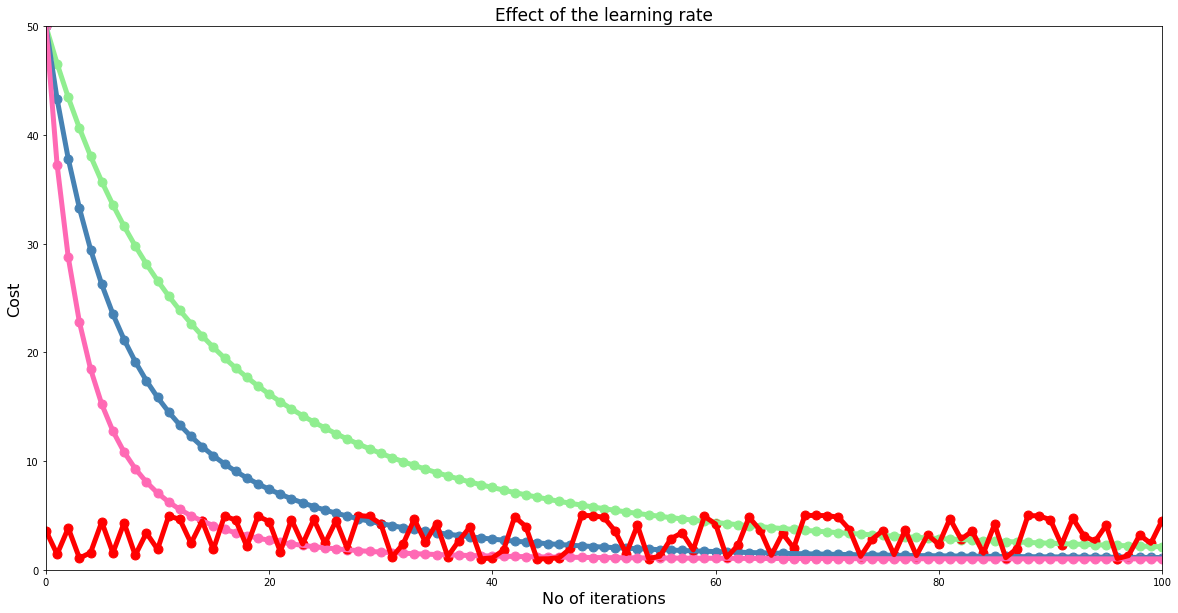

In [72]:
#Run gradient descent function 3 times
n=100
low_gamma=gradient_descent(derivative_func= dg,initial_guess= 3,multiplier=0.0005,max_iter=n,precision=0.0001)

#Challenge: Plot two more learning rates: mid_gamma (0.001) and high_gamma(0.002)
mid_gamma=gradient_descent(derivative_func= dg,initial_guess= 3,multiplier=0.001,max_iter=n,precision=0.0001)

high_gamma=gradient_descent(derivative_func= dg,initial_guess= 3,multiplier=0.002,max_iter=n,precision=0.0001)

insane_gamma=gradient_descent(derivative_func= dg,initial_guess= 1.9,multiplier=0.25,max_iter=n,precision=0.0001)

# Plotting reduction in cost for each iteration

plt.figure(figsize=[20,10])
# 1 Chart: Cost Function

plt.xlim(0,n)
plt.ylim(0,50)
plt.title('Effect of the learning rate',fontsize=17)
plt.xlabel('No of iterations',fontsize=16)
plt.ylabel('Cost',fontsize=16)

# values for charts
# 1) Y axis convert list to numpy array
low_values=np.array(low_gamma[1])
mid_values = np.array(mid_gamma[1])
high_values = np.array(high_gamma[1])
insane_values = np.array(insane_gamma[1])
# 2) X Axis Data: create a list from 0 to n+1

iteration_list=list(range(0,n+1))

#plotting low learning rate
plt.plot(iteration_list,g(low_values),c="lightgreen",lw=5)
plt.scatter(iteration_list,g(low_values),c='lightgreen',s=80)

#plotting mid learning rate
plt.plot(iteration_list,g(mid_values),c="steelblue",lw=5)
plt.scatter(iteration_list,g(mid_values),c='steelblue',s=80)

#plotting high learning rate
plt.plot(iteration_list,g(high_values),c="hotpink",lw=5)
plt.scatter(iteration_list,g(high_values),c='hotpink',s=80)
#plotting insane learning rate
plt.plot(iteration_list,g(insane_values),c="r",lw=5)
plt.scatter(iteration_list,g(insane_values),c='r',s=80)

plt.show()

# Example 4 - Data Viz with 3D Charts
## Minimise $$f(x,y) = \frac{1}{3^{-x^2 - y^2} + 1}$$
## Minimise $$f(x,y) = \frac{1}{r+1}$$ where $r$ is $3^{-x^2-y^2}$ 

In [73]:
def f(x,y):
    r=3**( -x**2 - y**2)
    return 1/(r+1)

In [74]:
# Make our x and y data
x_4 = np.linspace(start=-2,stop=2,num=200)
y_4 = np.linspace(start=-2,stop=2,num=200)
# convert 1-d to 2-d np array
x_4, y_4 = np.meshgrid(x_4,y_4)


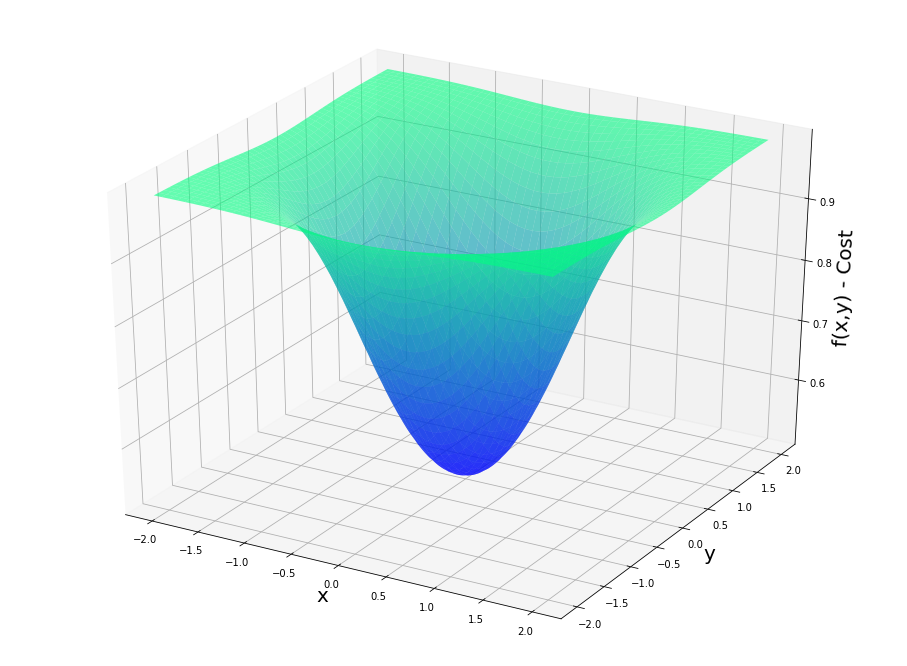

In [75]:
# Generate 3D plot
fig=plt.figure(figsize=[16,12])
ax = fig.gca(projection='3d')

ax.set_xlabel('x',fontsize=20)
ax.set_ylabel('y',fontsize=20)
ax.set_zlabel('f(x,y) - Cost',fontsize=20)


ax.plot_surface(x_4,y_4,f(x_4,y_4),cmap=cm.winter,alpha=0.6)
plt.show()


## Partial Derivatives &  Symbolic Computation
## $$\frac{\partial f}{\partial x} = \frac{2x \ln(3) \cdot 3^{-x^2 - y^2}}{\left(3^{-x^2 - y^2}+1\right)^2}$$
## $$\frac{\partial f}{\partial y} = \frac{2y \ln(3) \cdot 3^{-x^2 - y^2}}{\left(3^{-x^2 - y^2}+1\right)^2}$$


In [76]:
a, b = symbols('x, y')
print('Our cost function f(x,y) is:',f(a, b))
print('Partial Derivative wrt x is:',diff(f(a,b),a))
print('Value of f(x,y) at x=1.8 y=1.0 is:',
f(a,b).evalf(subs={a:1.8,b:1.0})) # Python Dictionary
print('Value of slope in the x-direction at x=1.8 y=1.0 is:',
diff(f(a,b),a).evalf(subs={a:1.8,b:1.0}))

Our cost function f(x,y) is: 1/(3**(-x**2 - y**2) + 1)
Partial Derivative wrt x is: 2*3**(-x**2 - y**2)*x*log(3)/(3**(-x**2 - y**2) + 1)**2
Value of f(x,y) at x=1.8 y=1.0 is: 0.990604794032582
Value of slope in the x-direction at x=1.8 y=1.0 is: 0.0368089716197505


## Batch Gradient Descent with SymPy

In [77]:
# Setup
multiplier = 0.1
max_iter = 500
params  = np.array([1.8,1.0]) # initial guess
for n in range(max_iter):
    gradient_x=diff(f(a,b),a).evalf(subs={a:params[0],b:params[1]})
    gradient_y=diff(f(a,b),b).evalf(subs={a:params[0],b:params[1]})
    gradients=np.array([gradient_x,gradient_y])
    params = params - multiplier * gradients
# results
print('Values in gradient array',gradients)
print('Minimum occurs at x value of:',params[0])
print('Minimum occurs at y value of:',params[1]) 
print('The cost is:',f(params[0],params[1]))   



Values in gradient array [2.01013037525579e-11 1.11673909736433e-11]
Minimum occurs at x value of: 3.45838599885832e-11
Minimum occurs at y value of: 1.92132555492129e-11
The cost is: 0.500000000000000


In [78]:
# Partial derivative function example 4
def fpx(x,y):
    r= 3**(-x**2-y**2)
    return 2*x*log(3)*r/(r+1)**2
def fpy(x,y):
    r= 3**(-x**2-y**2)
    return 2*y*log(3)*r/(r+1)**2


In [79]:
# Setup
multiplier = 0.1
max_iter = 500
params  = np.array([1.8,1.0]) # initial guess
for n in range(max_iter):
    gradient_x=fpx(x=params[0],y=params[1])
    gradient_y=fpy(x=params[0],y=params[1])
    gradients=np.array([gradient_x,gradient_y])
    params = params - multiplier * gradients
# results
print('Values in gradient array',gradients)
print('Minimum occurs at x value of:',params[0])
print('Minimum occurs at y value of:',params[1]) 
print('The cost is:',f(params[0],params[1]))   



Values in gradient array [2.01013038e-11 1.11673910e-11]
Minimum occurs at x value of: 3.458385998858304e-11
Minimum occurs at y value of: 1.9213255549212797e-11
The cost is: 0.5


## Graphing 3D Gradient Descent and Adv Numpy Arrays

In [80]:
# Setup
multiplier = 0.1
max_iter = 1000
params  = np.array([1.8,1.0]) # initial guess
values_array = params.reshape(1,2)

for n in range(max_iter):
    gradient_x=fpx(x=params[0],y=params[1])
    gradient_y=fpy(x=params[0],y=params[1])
    gradients=np.array([gradient_x,gradient_y])
    params = params - multiplier * gradients
    # values_array=np.append(arr=values_array,values=params.reshape(1,2),axis=0)
    values_array=np.concatenate((values_array,params.reshape(1,2)),axis=0)

# results
print('Values in gradient array',gradients)
print('Minimum occurs at x value of:',params[0])
print('Minimum occurs at y value of:',params[1]) 
print('The cost is:',f(params[0],params[1]))   



Values in gradient array [1.08410585e-23 6.02281029e-24]
Minimum occurs at x value of: 1.865180758685096e-23
Minimum occurs at y value of: 1.0362115326028303e-23
The cost is: 0.5


In [81]:
# Advanced Numpy Array Practice

kirk=np.array([['Captain','Guitar']])
print(kirk.shape)

hs_band = np.array([['Black Thought','MC'],['QuestLove','Drums']])
print(hs_band.shape)

print('hs_band[0] :',hs_band[0])
print('hs_band[1][0] :',hs_band[1][0])

the_roots = np.append(arr=hs_band,values=kirk,axis=0)
print(the_roots)

print('Printing nicknames....',the_roots[:,0])

the_roots=np.append(arr=the_roots,values=[['Malik B','MC']],axis=0)
print('Printing Band roles.....',the_roots[:,1])

(1, 2)
(2, 2)
hs_band[0] : ['Black Thought' 'MC']
hs_band[1][0] : QuestLove
[['Black Thought' 'MC']
 ['QuestLove' 'Drums']
 ['Captain' 'Guitar']]
Printing nicknames.... ['Black Thought' 'QuestLove' 'Captain']
Printing Band roles..... ['MC' 'Drums' 'Guitar' 'MC']


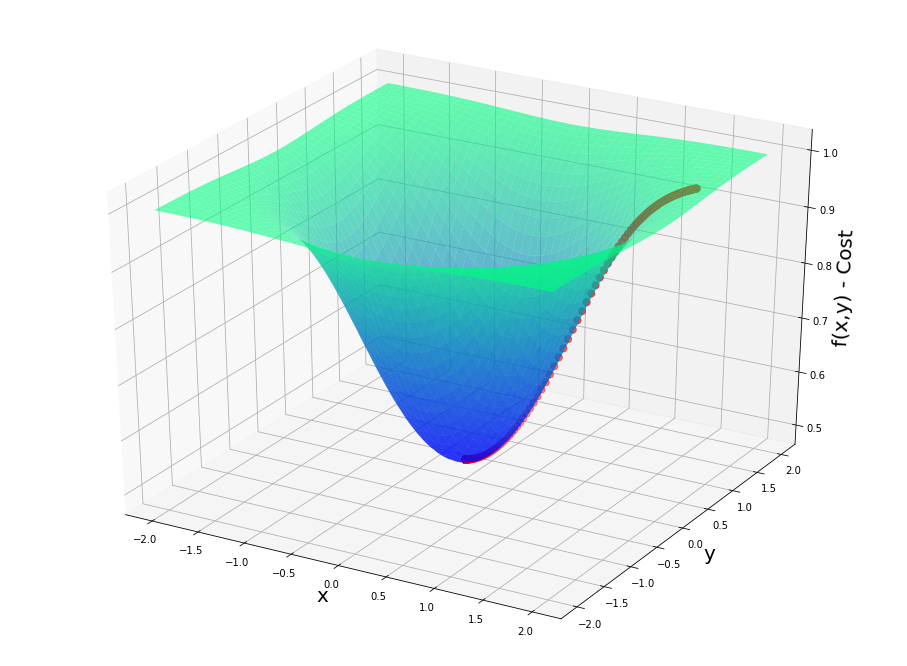

In [82]:
# Generate 3D plot
fig=plt.figure(figsize=[16,12])
ax = fig.gca(projection='3d')

ax.set_xlabel('x',fontsize=20)
ax.set_ylabel('y',fontsize=20)
ax.set_zlabel('f(x,y) - Cost',fontsize=20)


ax.plot_surface(x_4,y_4,f(x_4,y_4),cmap=cm.winter,alpha=0.6)
ax.scatter(values_array[:,0],values_array[:,1],
f(values_array[:,0],values_array[:,1]),s=50,c='r')
plt.show()


# Example 5 - Working with data and real cost function
## Mean Squared Error : a cost function for regression problems
### $$RSS = \sum_{i=1}^{n} \big( y^{(i)} - h_\theta x^{(i)}  \big)^2 $$ 
### $$MSE = \frac{1}{n}\sum_{i=1}^{n} \big( y^{(i)} - h_\theta x^{(i)}  \big)^2 $$ 
### $$MSE = \frac{1}{n}\sum_{i=1}^{n} \big( y - \hat{y}  \big)^2 $$ 



In [83]:
# Make sample data
# two different methods
x_5 = np.array([[0.1,1.2,2.4,3.2,4.1,5.7,6.5]]).transpose()
y_5 = np.array([1.7,2.4,3.5,3.0,6.1,9.4,8.2]).reshape(7,1)

print('Shape of x_5 array:',x_5.shape)
print('Shape of y_5 array:',y_5.shape)



Shape of x_5 array: (7, 1)
Shape of y_5 array: (7, 1)


In [84]:
# Quick Linear Regression
regr=LinearRegression()
regr.fit(x_5,y_5)
print('Theta 0:',regr.intercept_[0])
print('Theta 1:',regr.coef_[0][0])



Theta 0: 0.8475351486029554
Theta 1: 1.222726463783591


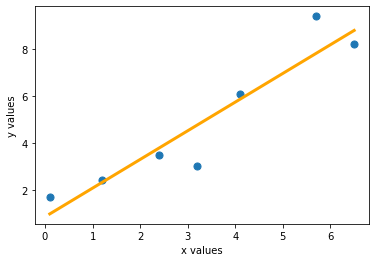

In [85]:
plt.scatter(x_5,y_5,s=50)
plt.plot(x_5,regr.predict(x_5),c='orange',lw=3)
plt.xlabel('x values')
plt.ylabel('y values')
plt.show()

In [86]:
# y_hat = theta0 + theta1*x
y_hat= 0.8475351486029554 + 1.222726463783591*x_5
print('Estimated values y_hat are:\n',y_hat)
print('In comparison the actual y values are \n',y_5)

Estimated values y_hat are:
 [[0.96980779]
 [2.31480691]
 [3.78207866]
 [4.76025983]
 [5.86071365]
 [7.81707599]
 [8.79525716]]
In comparison the actual y values are 
 [[1.7]
 [2.4]
 [3.5]
 [3. ]
 [6.1]
 [9.4]
 [8.2]]


In [87]:
#Challenge: Write the python function mse(y,y_hat) returns MSE? Call the mse(y,y_hat)
# function and print out the MSE for the y_hat calculated above
# def mse(y,y_hat):
#     mse_calc=0
#     n=y.size
#     for i in range(n):
#         mse_calc= mse_calc+ ((y[i]-y_hat[i])**2)/n
#     return mse_calc[0]
def mse(y,y_hat):
    # return(1/y.size)*sum((y-y_hat)**2)[0]
    return np.average((y-y_hat)**2,axis=0)[0]
    


In [88]:
print('Manually calculated MSE is:',mse(y_5,y_hat))
print('MSE regression using manual calc is:',mean_squared_error(y_5,y_hat))
print('MSE regression is:',mean_squared_error(y_5,regr.predict(x_5)))

Manually calculated MSE is: 0.9479655759794575
MSE regression using manual calc is: 0.9479655759794575
MSE regression is: 0.9479655759794575


# 3D Plot for the MSE cost function
### Make data for thetas

In [89]:
nr_thetas =200
th_0 = np.linspace(start=-1,stop=3,num=nr_thetas)
th_1 = np.linspace(start=-1,stop=3,num=nr_thetas)
plot_t0,plot_t1 = np.meshgrid(th_0,th_1)


## Calc MSE using nested for loops

In [90]:
plot_cost=np.zeros((nr_thetas,nr_thetas))
for i in range(nr_thetas):
    for j in range(nr_thetas):
        # print(plot_t0[i][j])
        y_hat = plot_t0[i][j]+plot_t1[i][j]*x_5
        plot_cost[i][j]=mse(y_5,y_hat)
print('Shape of plot_t0',plot_t0.shape)
print('Shape of plot_t1',plot_t1.shape)
print('Shape of plot_cost',plot_cost.shape)



Shape of plot_t0 (200, 200)
Shape of plot_t1 (200, 200)
Shape of plot_cost (200, 200)


In [91]:
# Nested loop praactice
for i in range(3):
    for j in range(3):
        print(f"value of i is {i} and j is {j}")

value of i is 0 and j is 0
value of i is 0 and j is 1
value of i is 0 and j is 2
value of i is 1 and j is 0
value of i is 1 and j is 1
value of i is 1 and j is 2
value of i is 2 and j is 0
value of i is 2 and j is 1
value of i is 2 and j is 2


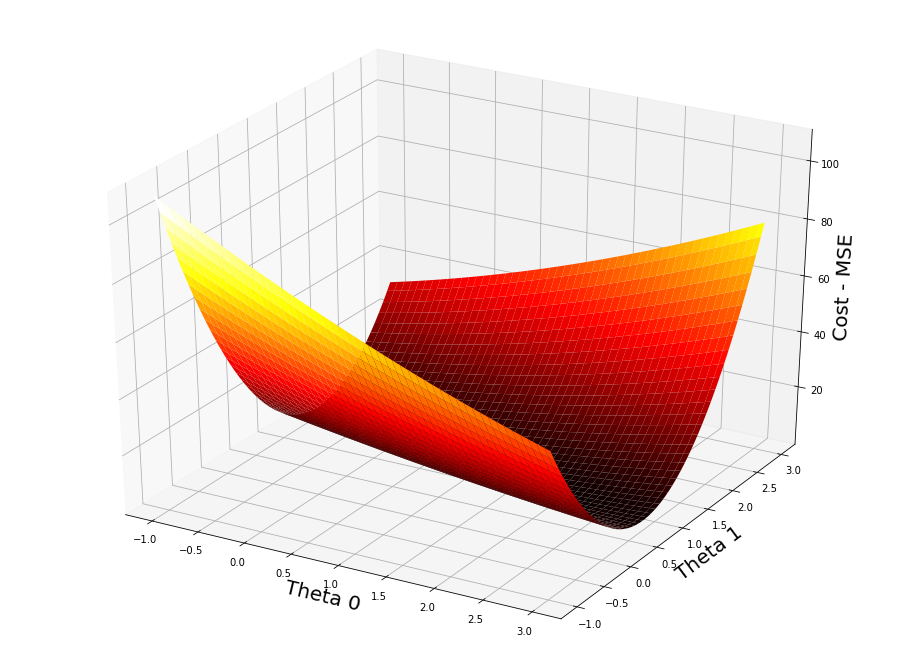

In [92]:
# plotting MSE 
fig=plt.figure(figsize=[16,12])
ax=fig.gca(projection='3d')

ax.set_xlabel('Theta 0',fontsize=20)
ax.set_ylabel('Theta 1',fontsize=20)
ax.set_zlabel('Cost - MSE',fontsize=20)

ax.plot_surface(plot_t0,plot_t1,plot_cost,cmap=cm.hot)


plt.show()


In [93]:
print('Min value of plot_cost',plot_cost.min())
ij_min=np.unravel_index(indices=plot_cost.argmin(),dims=plot_cost.shape)
print('Min occurs at (i,j):',ij_min)
print('Min MSE for Theta 0 at plot_t0[111][91]',plot_t0[111][91])
print('Min MSE for Theta 1 at plot_t1[111][91]',plot_t1[111][91])


Min value of plot_cost 0.9483826526747164
Min occurs at (i,j): (111, 91)
Min MSE for Theta 0 at plot_t0[111][91] 0.829145728643216
Min MSE for Theta 1 at plot_t1[111][91] 1.2311557788944723
<ipython-input-93-1ab0a607cc52>:2: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  ij_min=np.unravel_index(indices=plot_cost.argmin(),dims=plot_cost.shape)


## Partial Derivatives of MSE w.r.t $\theta_0$ and $\theta_1$ 
## $$\frac{\partial MSE}{\partial \theta_0} = -\frac{2}{n} \sum_{i=1}^{n} \big(y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big) $$
## $$\frac{\partial MSE}{\partial \theta_1} = -\frac{2}{n} \sum_{i=1}^{n} \big(y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big) \big( x^{(i)} \big)$$


## MSE & Gradient Descent

In [94]:
# x values, y values ,array of theta parameters (theta 0 at index 0 and theta 1 at index 1)
def grad(x,y,thetas):
    n=y.size
    theta0_slope= (-2/n)*np.sum(y-thetas[0] - thetas[1]*x)
    theta1_slope= (-2/n)*np.sum((y-thetas[0] - thetas[1]*x)*x)
    # return np.array(theta0_slope[0],theta1_slope[1])
    return np.append(theta0_slope,theta1_slope)
    # return np.concatenate((theta0_slope,theta1_slope),axis=0)

In [95]:
multiplier = 0.01
thetas = np.array([2.9,2.9])
#collect datapoints for scatter plot
plot_vals=thetas.reshape(1,2)
mse_vals= mse(y_5,thetas[0]+thetas[1]*x_5)
for i in range(1000):
    thetas = thetas - multiplier * grad(x_5,y_5,thetas)
    plot_vals = np.concatenate((plot_vals,thetas.reshape(1,2)),axis=0)
    mse_vals = np.append(mse_vals, mse(y_5,thetas[0]+thetas[1]*x_5))
#Results
print('Min occurs at Theta 0:',thetas[0])
print('Min occurs at Theta 1:',thetas[1])
print('MSE is:',mse(y_5,thetas[0]+thetas[1]*x_5))

Min occurs at Theta 0: 0.8532230461743415
Min occurs at Theta 1: 1.2214935332607393
MSE is: 0.9479751138321334


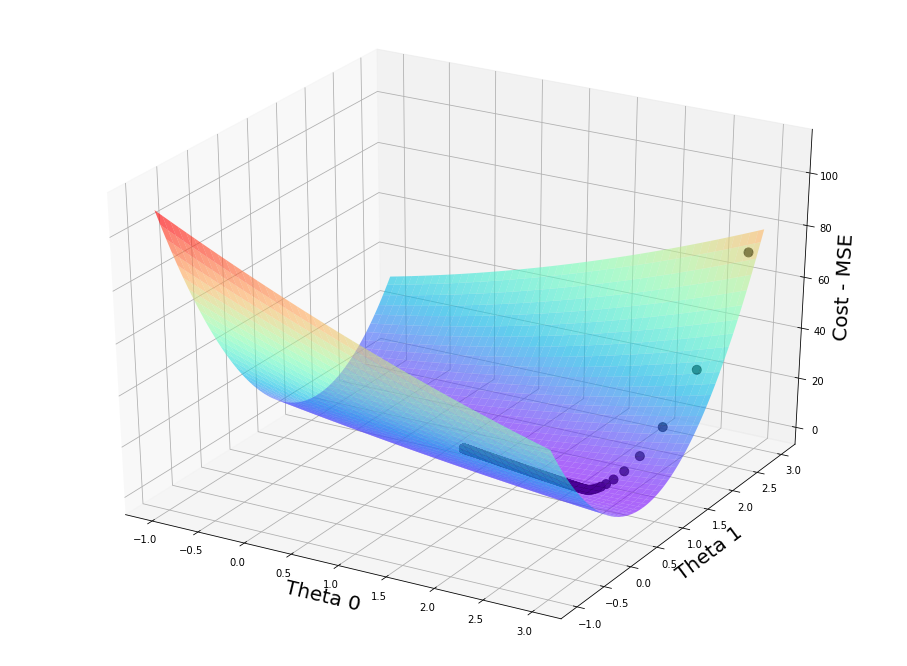

In [96]:
# plotting MSE 
fig=plt.figure(figsize=[16,12])
ax=fig.gca(projection='3d')

ax.set_xlabel('Theta 0',fontsize=20)
ax.set_ylabel('Theta 1',fontsize=20)
ax.set_zlabel('Cost - MSE',fontsize=20)
ax.scatter(plot_vals[:,0],plot_vals[:,1],mse_vals,s=80,c='black')

ax.plot_surface(plot_t0,plot_t1,plot_cost,cmap=cm.rainbow,alpha=0.6)

plt.show()
